# Analyse des vols d'avions 
Après avoir analysé un unique vols on s'attarderas dans cette partie à comparer les vols entre eux.
Pour ce faire ont utiliseras la parallélisation Dask

In [3]:
%reload_ext autoreload
%autoreload 2

# module
import sys
sys.path.append("../")
from src import * 

# chemin vers la donnee 
data_dir = 'C:/Users/felix/PycharmProjects/pythonProject1/MACS3-Statistiques-Descriptives-TDs/data/archive/'
filelist = glob.glob(data_dir + '*.h5')
filelist

['C:/Users/felix/PycharmProjects/pythonProject1/MACS3-Statistiques-Descriptives-TDs/data/archive\\Aircraft_01.h5',
 'C:/Users/felix/PycharmProjects/pythonProject1/MACS3-Statistiques-Descriptives-TDs/data/archive\\Aircraft_01_dask.h5',
 'C:/Users/felix/PycharmProjects/pythonProject1/MACS3-Statistiques-Descriptives-TDs/data/archive\\Aircraft_02.h5',
 'C:/Users/felix/PycharmProjects/pythonProject1/MACS3-Statistiques-Descriptives-TDs/data/archive\\Aircraft_02_dask.h5',
 'C:/Users/felix/PycharmProjects/pythonProject1/MACS3-Statistiques-Descriptives-TDs/data/archive\\Aircraft_03.h5',
 'C:/Users/felix/PycharmProjects/pythonProject1/MACS3-Statistiques-Descriptives-TDs/data/archive\\Aircraft_03_dask.h5']

In [4]:
ddf2 = lire_hdf_dask(filelist[2], repertoire= data_dir)
I = ddf2.map_partitions(lambda df: eliminate_records(df)).compute()
DDF2=ddf2.partitions[I==False]
ddf_norm2 = DDF2.map_partitions(lambda df : normalize(df))

In [13]:
import seaborn as sns

In [5]:
import src

In [ ]:
for i in range (0,990,10):

    

In [11]:
df_cor=ddf_norm2.partitions[900].compute()
corr = df_cor.corr()

In [15]:
df_cor2=ddf_norm2.partitions[5].compute()
corr2 = df_cor2.corr()
COR=corr-corr2

<Axes: >

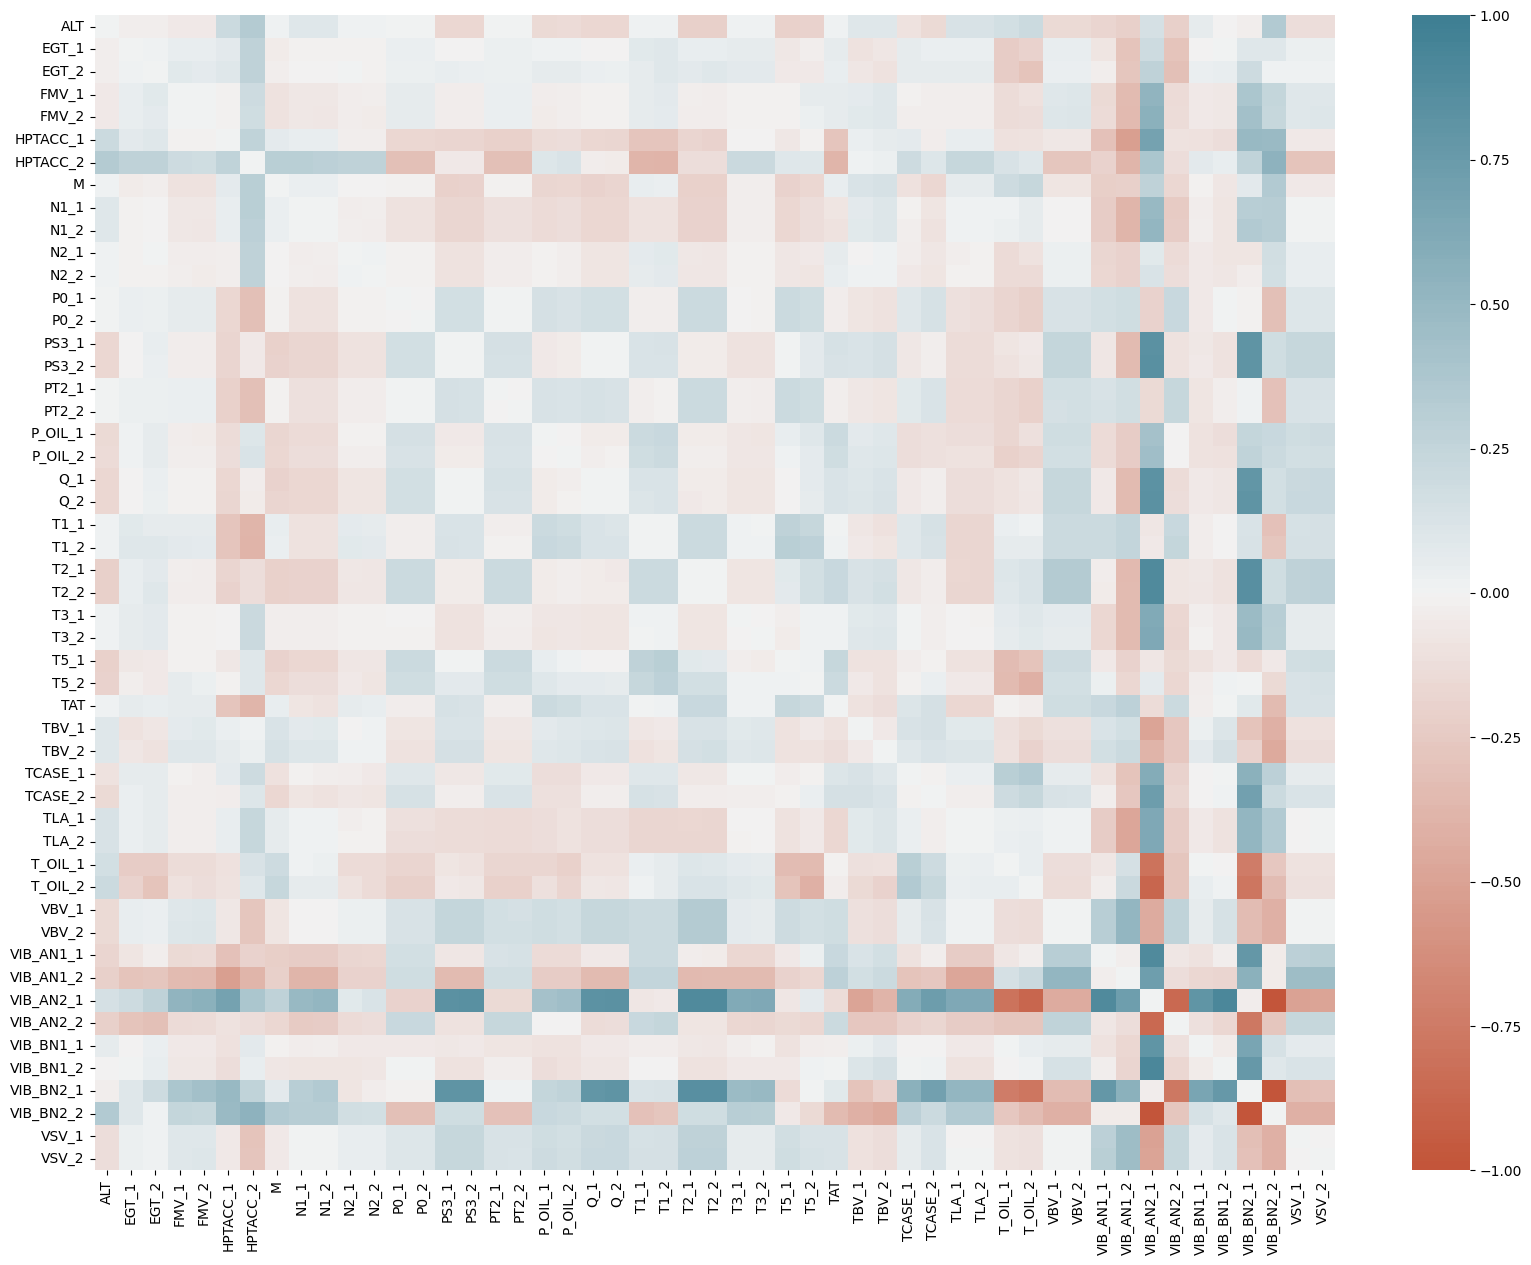

In [16]:
fig = plt.figure(figsize=(20,15))

sns.heatmap(COR, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))


In [22]:
corr['ALT'].iloc[1]

0.3606741117241711